Predicting Survival in the Titanic Data Set.

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [1]:
# Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,\
precision_score,recall_score,roc_curve,roc_auc_score

In [2]:
# Reading the csv file.

d_f = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
d_f

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Dummy encoding the catagorical data

dummy_variable = pd.get_dummies(d_f.Sex,drop_first=True) # Dropping one column and-
                                                         #representing male and female with 1 & 0 respectively.

In [4]:
# Creating a newe df with specified features alone (Pclass,Age,SibSp,Parch,Fare,Sex & Survived).

df = d_f.drop(columns=["PassengerId","Survived","Name","Ticket","Cabin","Embarked","Sex"])
df["Sex"] = dummy_variable
df["Survived"] = d_f.Survived
df

,Pclass,Age,SibSp,Parch,Fare,Sex,Survived
0,3,22.0,1,0,7.2500,1,0
1,1,38.0,1,0,71.2833,0,1
2,3,26.0,0,0,7.9250,0,1
3,1,35.0,1,0,53.1000,0,1
4,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0
887,1,19.0,0,0,30.0000,0,1
888,3,NaN,1,2,23.4500,0,0
889,1,26.0,0,0,30.0000,1,1


In [5]:
# Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Sex       891 non-null    uint8  
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [6]:
# Checking for missing values.

df.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [7]:
# Age column has missing values. Treating missing values by "mean imputation" method and converting it into int64.

df["Age"] = df.Age.fillna(np.mean(df.Age)).astype(np.int64)
df.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Survived    0
dtype: int64

In [8]:
# Declaring x & y

x = df.drop(columns="Survived")
y = df["Survived"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

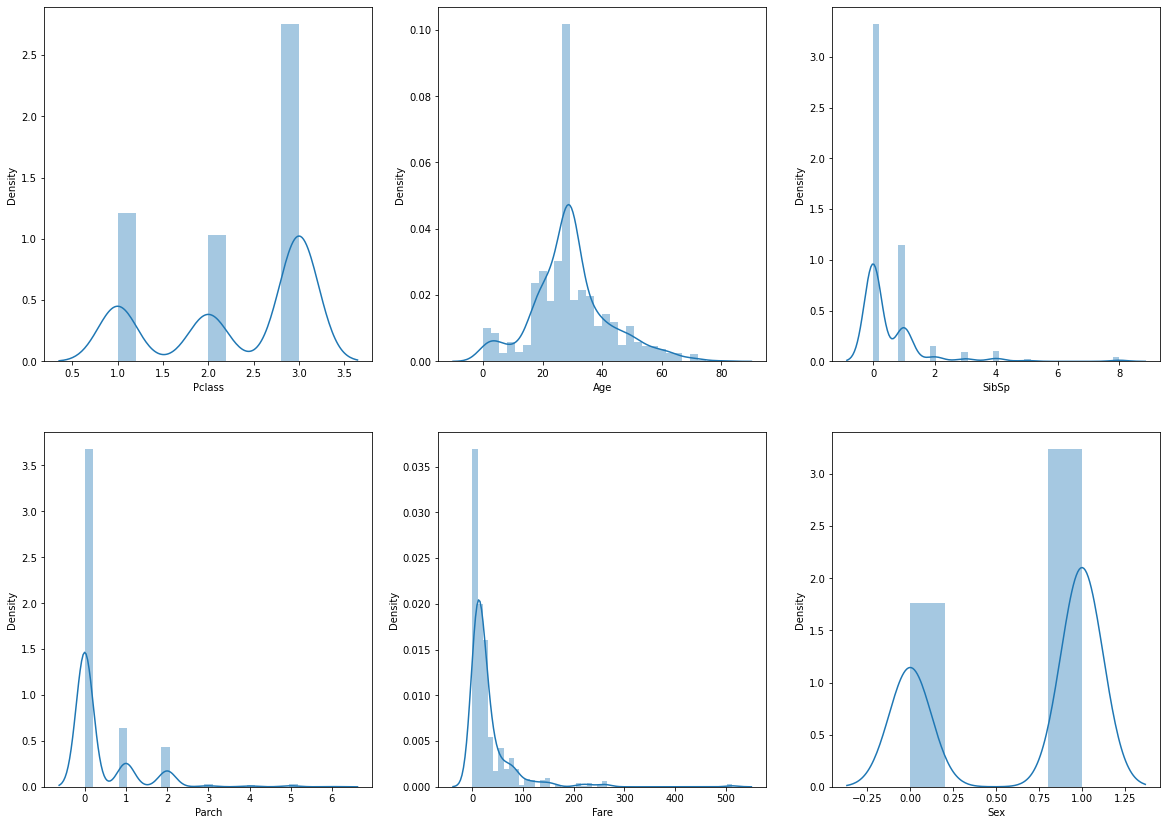

In [9]:
# Plotting "Distribution-Plot" to know the data distribution.

plt.figure(figsize=(20,30))
plot_num = 1
for i in x.columns:
    if plot_num<7:
        plt.subplot(4,3,plot_num)
        sns.distplot(x[i])
        plot_num += 1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\

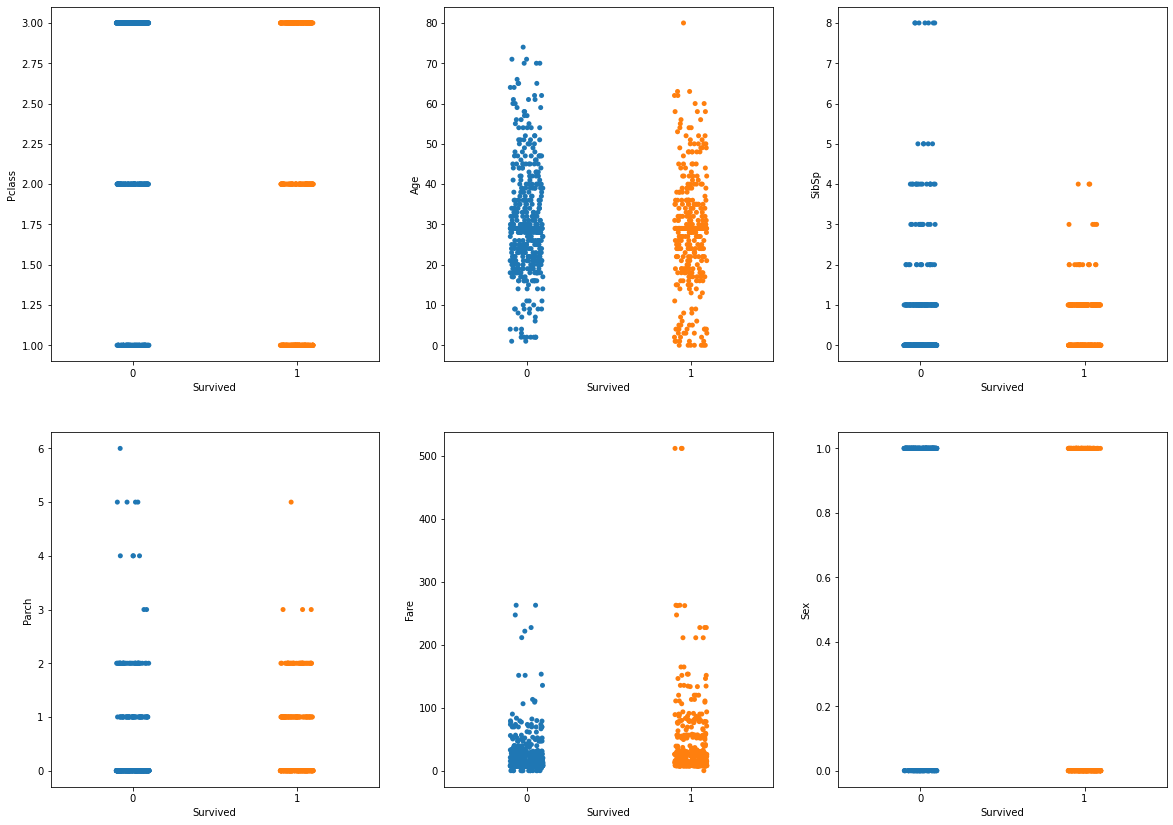

In [10]:
# Plotting "Strip-Plot" to know the relation between dependent and independent variables.

plt.figure(figsize=(20,30))
plot_num = 1
for i in x.columns:
    if plot_num<7:
        plt.subplot(4,3,plot_num)
        sns.stripplot(y,x[i],)
        plot_num += 1
plt.show()

In [11]:
# Stansardising the data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
# Variance_Inflation_Factor.

vif = pd.DataFrame()
vif["Feature"] = x.columns
vif["VIF"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Feature,VIF
0,Pclass,1.674463
1,Age,1.207349
2,SibSp,1.274705
3,Parch,1.315092
4,Fare,1.592800
5,Sex,1.099948


In [13]:
# Finding correlation

df.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex,Survived
Pclass,1.000000,-0.335071,0.083081,0.018443,-0.549500,0.131900,-0.338481
Age,-0.335071,1.000000,-0.232743,-0.176744,0.093856,0.082533,-0.067809
SibSp,0.083081,-0.232743,1.000000,0.414838,0.159651,-0.114631,-0.035322
Parch,0.018443,-0.176744,0.414838,1.000000,0.216225,-0.245489,0.081629
Fare,-0.549500,0.093856,0.159651,0.216225,1.000000,-0.182333,0.257307
Sex,0.131900,0.082533,-0.114631,-0.245489,-0.182333,1.000000,-0.543351
Survived,-0.338481,-0.067809,-0.035322,0.081629,0.257307,-0.543351,1.000000


#### There's no "Multi-Collinearity" issue.

### Creating Decision_tree model.

In [14]:
# Doing train test split on data.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=1,test_size=.25)

In [15]:
# Training a decisoin tree classifier by fitting on the data.

model_1 = tree.DecisionTreeClassifier()
model_1.fit(x_train,y_train)
model_1.get_depth()

19

In [16]:
# Printing accuracy,precision,recall.

y_pred = model_1.predict(x_test)
print("Train_score = ",model_1.score(x_train,y_train))
print("Test_score = ",model_1.score(x_test,y_test))
print("\nRecall_score = ",recall_score(y_test,y_pred))
print("Precision_score = ",precision_score(y_test,y_pred))

Train_score =  0.9865269461077845
Test_score =  0.757847533632287

Recall_score =  0.6210526315789474
Precision_score =  0.7662337662337663


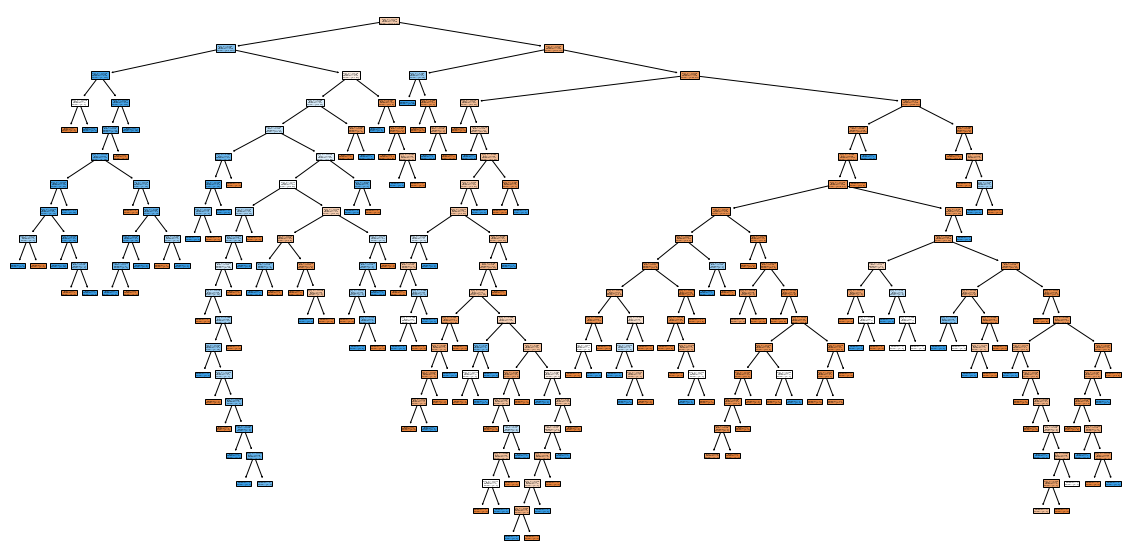

In [17]:
# Visualizing the tree.

plt.figure(figsize=(20,10))
tree.plot_tree(model_1,filled=True)
plt.show()

This is an overfitting scenario where classsification is done to maximum depth.

Hence we get:-     

                    Train_score = 98.6
                    Test_score = 76.2
                    
Now we need to perform certain procedures to prevent the overfitting and make the model perform well on both the train and test data set equally. We will perform "POST-PRUNING".

### Findind best value for "ccp_alpha" using "COST COMPLEXITY PRUNING".

In [18]:
# Finding the ccp_alpha values.

path = model_1.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 3.56429997e-05, 4.15834997e-05,
       6.04850904e-05, 7.12859994e-05, 8.50571584e-05, 9.98003992e-05,
       9.98003992e-05, 1.24750499e-04, 3.92072997e-04, 5.30664861e-04,
       5.98802395e-04, 7.24357736e-04, 7.48502994e-04, 9.07276356e-04,
       9.98003992e-04, 9.98003992e-04, 1.00691474e-03, 1.12502268e-03,
       1.19760479e-03, 1.19760479e-03, 1.19760479e-03, 1.20538144e-03,
       1.26669737e-03, 1.32648664e-03, 1.34730539e-03, 1.34730539e-03,
       1.37225549e-03, 1.38185168e-03, 1.42215569e-03, 1.48388437e-03,
       1.49700599e-03, 1.49700599e-03, 1.49700599e-03, 1.56372738e-03,
       1.59680639e-03, 1.62868707e-03, 1.72155689e-03, 1.74650699e-03,
       1.77030859e-03, 1.81543145e-03, 1.85254491e-03, 1.99600798e-03,
       2.07917498e-03, 2.14702806e-03, 2.21202616e-03, 2.24550898e-03,
       2.56629598e-03, 2.56629598e-03, 2.57342458e-03, 2.59481038e-03,
       2.69461078e-03, 2.83156405e-03, 3.15177974e-03, 3.37653108e-03,
      

In [19]:
# Making different model for each ccp_alpha values and making a list ("models") which holds all decision trees.

models = []
for i in ccp_alphas:
    model = tree.DecisionTreeClassifier(ccp_alpha=i)
    model.fit(x_train,y_train)
    models.append(model)

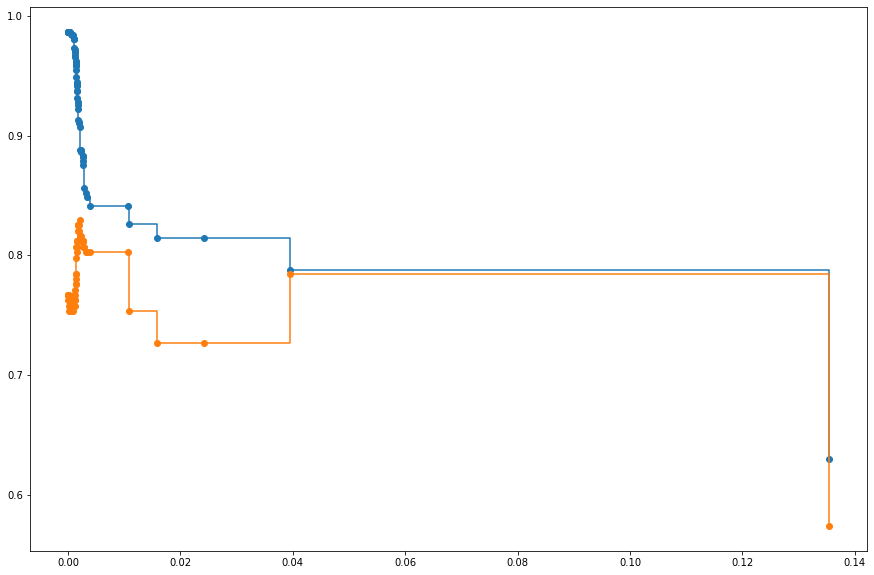

In [20]:
# Making lists out of 'train and test scores' obtained from each model in the "models" list. 

train_scores = [i.score(x_train,y_train) for i in models]
test_scores = [i.score(x_test,y_test) for i in models]

# Plotting a graph with ccp_alpha on x-axis and accuracy on y-axis.

plt.figure(figsize=(15,10))
plt.plot(ccp_alphas,train_scores,marker='o',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,marker='o',drawstyle='steps-post')

In [21]:
# Making a data frame using train_scores,test_scores & ccp_alphas

cost_df = pd.DataFrame()
cost_df['train_scores'],cost_df['test_scores'],cost_df['ccp_alphas'] = train_scores,test_scores,ccp_alphas
cost_df.tail(59)

,train_scores,test_scores,ccp_alphas
4,0.986527,0.762332,0.000060
5,0.986527,0.762332,0.000071
6,0.986527,0.753363,0.000085
7,0.986527,0.762332,0.000100
8,0.986527,0.757848,0.000100
9,0.986527,0.766816,0.000125
10,0.986527,0.757848,0.000392
11,0.985030,0.757848,0.000531
12,0.985030,0.757848,0.000599
13,0.983533,0.753363,0.000724


In [22]:
# Model based on the best "ccp_alpha" value.

model_2 = tree.DecisionTreeClassifier(ccp_alpha=0.003935)
model_2.fit(x_train,y_train)
y_pred = model_2.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("\nDepth = ",model_2.get_depth())
print("Train_score = ",model_2.score(x_train,y_train))
print("Test_score = ",model_2.score(x_test,y_test))
print("\nRecall_score = ",recall_score(y_test,y_pred))
print("Precision_score = ",precision_score(y_test,y_pred))

[[115  13]
 [ 31  64]]

Depth =  3
Train_score =  0.8413173652694611
Test_score =  0.8026905829596412

Recall_score =  0.6736842105263158
Precision_score =  0.8311688311688312


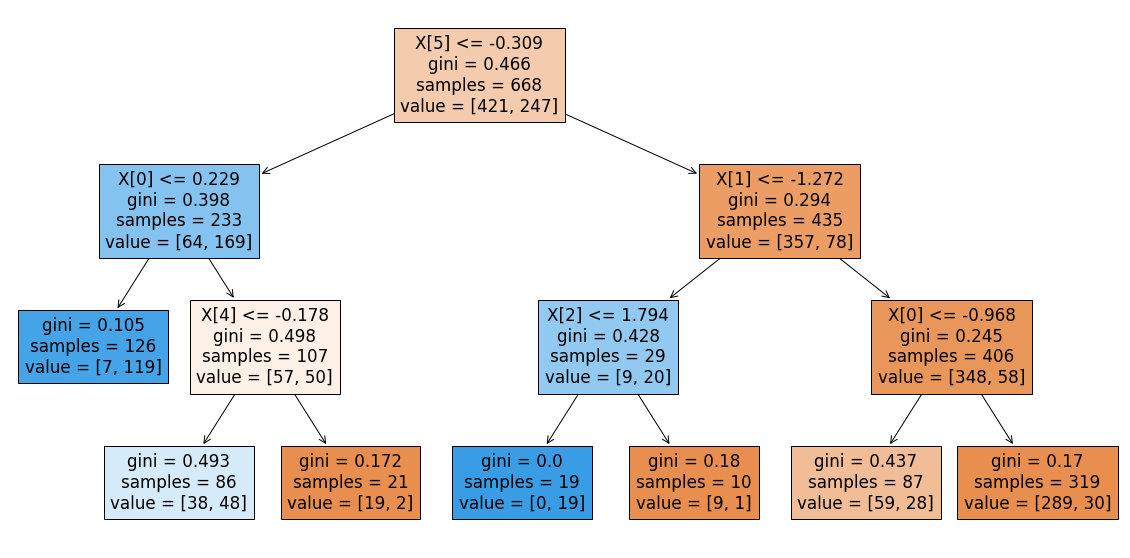

In [23]:
# Visualizing the tree

plt.figure(figsize=(20,10))
tree.plot_tree(model_2,filled=True)
plt.show()

In [24]:
# Finding AUC_SCORE

print("Acuracy_score = ",accuracy_score(y_test,y_pred))
auc = roc_auc_score(y_test,y_pred)
print("Area_Under_Curve for Model_2 = ",auc)

Acuracy_score =  0.8026905829596412
Area_Under_Curve for Model_2 =  0.7860608552631578


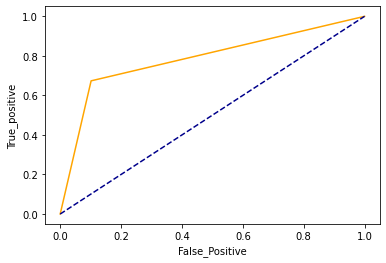

In [25]:
# Plotting ROC curve

fpr,tpr,threshhold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color="orange")
#plt.plot([0,0],[1,1],color="darkblue",linestyle="--")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel("False_Positive")
plt.ylabel("True_positive")
plt.show()

##### We found that for ccp_alpha = 0.003935 we get a good model with good train_score,test_score,precision_score & recall_score.

### Doing GridSearchCV

In [31]:
para = {'criterion':['gini','entropy'],
        'splitter':['best','random'],
       'max_depth':range(2,30),
       'min_samples_split':range(2,10),
        'min_samples_leaf':range(1,10)}


# Doing GridSearchCV with CV=10


grid_search = GridSearchCV(estimator=model_2,
                          param_grid=para,
                          cv=10,
                           n_jobs=1)

# Fitting the GridSearchCV onto the training data.

grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(ccp_alpha=0.003935),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [32]:
# Best parameters and best score on hyper para tuning.

print(" Best parameters\n","-"*100,"\n",grid_search.best_params_)
print("\n\n Best score\n","-"*100,"\n",grid_search.best_score_)

 Best parameters
 ---------------------------------------------------------------------------------------------------- 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


 Best score
 ---------------------------------------------------------------------------------------------------- 
 0.8353007688828585


In [33]:
# Building the model with the obtained parameters.

model_3 = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=1,min_samples_split=2,splitter='best')
model_3.fit(x_train,y_train)
y_pred = model_2.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Depth = ",model_3.get_depth())
print("Train_score = ",model_3.score(x_train,y_train))
print("Test_score = ",model_3.score(x_test,y_test))
print("\nRecall_score = ",recall_score(y_test,y_pred))
print("Precision_score = ",precision_score(y_test,y_pred))

[[115  13]
 [ 31  64]]
Depth =  3
Train_score =  0.8413173652694611
Test_score =  0.8026905829596412

Recall_score =  0.6736842105263158
Precision_score =  0.8311688311688312


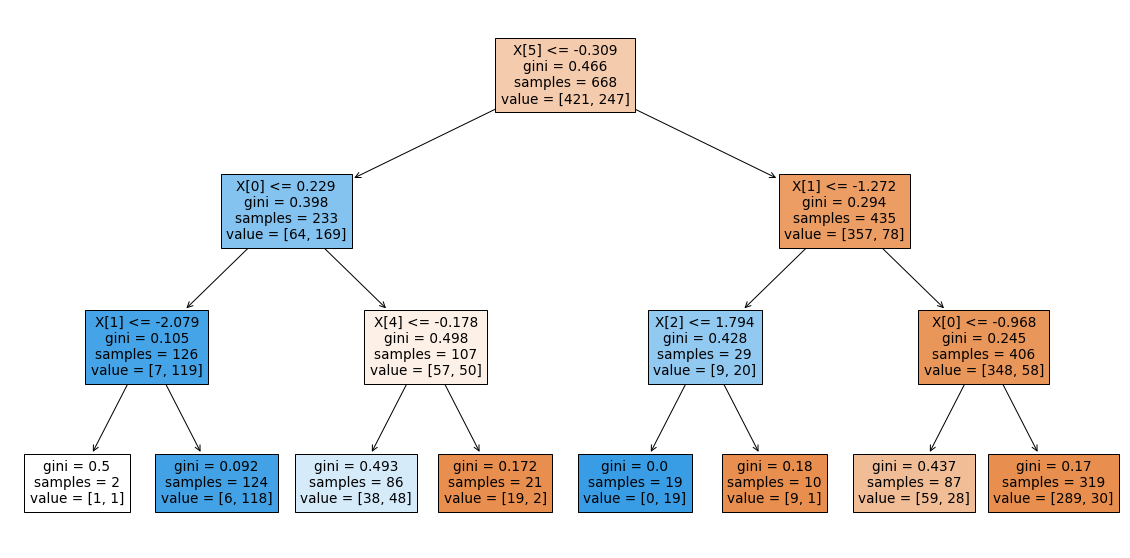

In [34]:
# Visualizing the tree.

plt.figure(figsize=(20,10))
tree.plot_tree(model_3,filled=True)
plt.show()

In [35]:
print("Acuracy_score = ",accuracy_score(y_test,y_pred))
auc = roc_auc_score(y_test,y_pred)
print("Area_Under_Curve for Model_3 = ",auc)

Acuracy_score =  0.8026905829596412
Area_Under_Curve for Model_3 =  0.7860608552631578


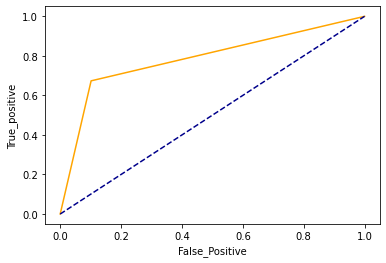

In [36]:
# Plotting roc_curve

fpr,tpr,threshhold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color="orange")
#plt.plot([0,0],[1,1],color="darkblue",linestyle="--")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel("False_Positive")
plt.ylabel("True_positive")
plt.show()

### Doing KFOLD Cross validation

In [37]:
kfold = KFold(10)
kfold.get_n_splits()
cnt = 0
train_list = []
test_list = []
precision_list = []
recall_list = []
for train_index,test_index in kfold.split(x_scaled):
    x_train,x_test = x_scaled[train_index],x_scaled[test_index]
    y_train,y_test = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(ccp_alpha=0.003935)
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    train_list.append(train_score)
    test_list.append(test_score)
    precision_list.append(precision)
    recall_list.append(recall)
    cnt += 1
    print("\nfor k = {}\ntrain_score = {}\ttest_score = {}\nprecisionscore = {}\tRecall_Score = {}."\
          .format(cnt,train_score,test_score,precision,recall))
print("\n\n","-"*100)
print("\nThe avg train score is:-\t {}.\nThe avg test score is:-\t\t {}.".format(np.mean(train_list),np.mean(test_list)))
print("The avg precision_score is:-\t {}\nThe avg recall_score is:-\t {}.".format(np.mean(precision_list),np.mean(recall_list)))


for k = 1
train_score = 0.8551810237203495	test_score = 0.7666666666666667
precisionscore = 0.8	Recall_Score = 0.6153846153846154.

for k = 2
train_score = 0.830423940149626	test_score = 0.8314606741573034
precisionscore = 0.6190476190476191	Recall_Score = 0.65.

for k = 3
train_score = 0.8615960099750624	test_score = 0.7752808988764045
precisionscore = 0.7916666666666666	Recall_Score = 0.5588235294117647.

for k = 4
train_score = 0.830423940149626	test_score = 0.8651685393258427
precisionscore = 0.9024390243902439	Recall_Score = 0.8222222222222222.

for k = 5
train_score = 0.8316708229426434	test_score = 0.8089887640449438
precisionscore = 0.7777777777777778	Recall_Score = 0.7567567567567568.

for k = 6
train_score = 0.8354114713216958	test_score = 0.797752808988764
precisionscore = 0.7692307692307693	Recall_Score = 0.625.

for k = 7
train_score = 0.8428927680798005	test_score = 0.7865168539325843
precisionscore = 0.8125	Recall_Score = 0.6666666666666666.

for k = 8
train_score = 0.8

KfoldCV gives the average scores for train,test,precision and recall are 84.3,81.3,79.4,67.6 respectively, which is a good value.

## Model_2 and Model_3 are giving similar accuracy, precision, recall and ROC curve.